In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('global_superstore_2016.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,40098,CA-2014-AB10015140-41954,11-11-2014,11/13/2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,02-05-2014,02-07-2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,($288.77),923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/2014,10/18/2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/2014,1/30/2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,($96.54),910.16,Medium
4,47221,SG-2014-RH9495111-41948,11-05-2014,11-06-2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [3]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
Postal Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales              object
Quantity            int64
Discount          float64
Profit             object
Shipping Cost     float64
Order Priority     object
dtype: object

# Clean Data

In [4]:
pd.to_datetime(df['Order Date'])
pd.to_datetime(df['Ship Date'])

0       2014-11-13
1       2014-02-07
2       2014-10-18
3       2014-01-30
4       2014-11-06
           ...    
51285   2015-06-19
51286   2014-05-10
51287   2012-08-31
51288   2013-02-21
51289   2013-05-26
Name: Ship Date, Length: 51290, dtype: datetime64[ns]

In [5]:
df['Order Date'] = df['Order Date'].replace('/', '-', regex = True)
df['Ship Date'] = df['Ship Date'].replace('/', '-', regex = True)

In [6]:
df['Sales'] = df['Sales'].str.replace('$', '', regex=True)
df['Sales'] = df['Sales'].str.replace(',', '', regex=True)
df['Sales']

0         221.98 
1        3709.40 
2        5175.17 
3        2892.51 
4        2832.96 
           ...   
51285      65.10 
51286      16.72 
51287       8.56 
51288      13.44 
51289      61.38 
Name: Sales, Length: 51290, dtype: object

In [7]:
df['Profit'] = df['Profit'].str.replace('$', '', regex=True)
df['Profit'] = df['Profit'].str.replace(',', '', regex=True)
df['Profit'] = df['Profit'].str.replace('(', '', regex=True)
df['Profit'] = df['Profit'].str.replace(')', '', regex=True)
df['Profit']

0         62.15 
1         288.77
2        919.97 
3          96.54
4        311.52 
          ...   
51285      4.50 
51286      3.34 
51287      2.48 
51288      2.40 
51289      1.80 
Name: Profit, Length: 51290, dtype: object

In [8]:
df['Year'] = df['Ship Date'].str.slice(start = -4)
df['Year']

0        2014
1        2014
2        2014
3        2014
4        2014
         ... 
51285    2015
51286    2014
51287    2012
51288    2013
51289    2013
Name: Year, Length: 51290, dtype: object

In [9]:
df['Sales'] = pd.to_numeric(df['Sales'], downcast='integer')
df['Profit'] = pd.to_numeric(df['Profit'], downcast='integer')

In [10]:
df['Sum_Profit'] = df['Quantity'] * df['Profit']
df.insert(22, 'Sum_Profit', df.pop('Sum_Profit'))
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sum_Profit,Shipping Cost,Order Priority,Year
0,40098,CA-2014-AB10015140-41954,11-11-2014,11-13-2014,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,124.30,40.770,High,2014
1,26341,IN-2014-JR162107-41675,02-05-2014,02-07-2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,288.77,2598.93,923.630,Critical,2014
2,25330,IN-2014-CR127307-41929,10-17-2014,10-18-2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,8279.73,915.490,Medium,2014
3,13524,ES-2014-KM1637548-41667,1-28-2014,1-30-2014,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,96.54,482.70,910.160,Medium,2014
4,47221,SG-2014-RH9495111-41948,11-05-2014,11-06-2014,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,2492.16,903.040,Critical,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,6-19-2015,6-19-2015,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.0,4.50,22.50,1.010,Medium,2015
51286,34337,US-2014-ZD21925140-41765,05-06-2014,05-10-2014,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.72,5,0.2,3.34,16.70,1.930,High,2014
51287,31315,CA-2012-ZD21925140-41147,8-26-2012,8-31-2012,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,Art,Newell 341,8.56,2,0.0,2.48,4.96,1.580,High,2012
51288,9596,MX-2013-RB1979518-41322,2-17-2013,2-21-2013,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,Binders,"Acco Index Tab, Economy",13.44,2,0.0,2.40,4.80,1.003,Medium,2013


In [11]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Sum_Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490685,3.476545,0.142908,64.510750,314.816680,26.478567
std,14806.29199,32063.693350,487.565388,2.278766,0.212280,164.473988,1170.961072,57.251373
min,1.00000,1040.000000,0.440000,1.000000,0.000000,0.000000,0.000000,1.002000
25%,12823.25000,23223.000000,30.762500,2.000000,0.000000,6.300000,13.800000,2.610000
50%,25645.50000,56430.500000,85.055000,3.000000,0.000000,18.620000,52.920000,7.790000
75%,38467.75000,90008.000000,251.055000,5.000000,0.200000,57.240000,205.440000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.980000,64302.810000,933.570000


In [12]:
Sales_year = df.groupby(df['Year'])['Sales'].sum()
Sales_year

Year
2012    2234324.00
2013    2665070.95
2014    3390477.39
2015    4292497.10
2016      60137.81
Name: Sales, dtype: float64

In [13]:
Profit_year = df.groupby(df['Year'])['Profit'].sum()
Profit_year

Year
2012     579653.23
2013     697987.13
2014     896980.57
2015    1117738.78
2016      16396.68
Name: Profit, dtype: float64

In [14]:
Sales_Market = df.groupby(df['Market'])['Sales'].sum()
Sales_Market

Market
Africa           783773.37
Asia Pacific    4042660.74
Europe          3287338.58
LATAM           2164605.32
USCA            2364129.24
Name: Sales, dtype: float64

In [15]:
Sales_Region = df.groupby(df['Region'])['Sales'].sum()
Sales_Region

Region
Canada                 66928.17
Caribbean             324280.89
Central Africa        143630.01
Central America      1223100.79
Central Asia           19311.48
Central US            501239.88
Eastern Africa        127856.06
Eastern Asia          855059.62
Eastern Europe        310033.44
Eastern US            678781.36
North Africa          233216.61
Northern Europe       636779.95
Oceania              1100185.69
South America         617223.64
Southeastern Asia     884423.95
Southern Africa       105191.76
Southern Asia         866573.05
Southern Europe       608594.14
Southern US           391721.90
Western Africa        173878.93
Western Asia          317106.95
Western Europe       1731931.05
Western US            725457.93
Name: Sales, dtype: float64

In [16]:
Sales_Country = df.groupby(df['Country'])['Sales'].sum()
Sales_Country

Country
Afghanistan       21673.32
Albania            3888.12
Algeria           36091.59
Angola            25554.00
Argentina         57511.75
                    ...   
Vietnam           65210.11
Western Sahara      666.36
Yemen              2465.72
Zambia            26035.50
Zimbabwe           3765.13
Name: Sales, Length: 165, dtype: float64

In [17]:
Sales_Sub_Category = df.groupby(df['Sub-Category'])['Sales'].sum()
Sales_Sub_Category

Sub-Category
Accessories     749237.28
Appliances     1010535.76
Art             371613.70
Binders         461870.09
Bookcases      1466572.55
Chairs         1501682.16
Copiers        1509436.51
Envelopes       169217.58
Fasteners        89495.19
Furnishings     385156.15
Labels           73350.55
Machines        779060.32
Paper           241787.67
Phones         1706824.65
Storage        1126813.78
Supplies        242811.14
Tables          757042.17
Name: Sales, dtype: float64

# Asia Pacific

In [18]:
Asia_Pacific_table = df.loc[df['Market'] == 'Asia Pacific']
Asia_Pacific_table.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sum_Profit,Shipping Cost,Order Priority,Year
1,26341,IN-2014-JR162107-41675,02-05-2014,02-07-2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,288.77,2598.93,923.63,Critical,2014
2,25330,IN-2014-CR127307-41929,10-17-2014,10-18-2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,8279.73,915.49,Medium,2014
5,22732,IN-2014-JM156557-41818,6-28-2014,07-01-2014,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,...,Phones,"Samsung Smart Phone, with Caller ID",2862.68,5,0.1,763.28,3816.40,897.35,Critical,2014
6,30570,IN-2012-TS2134092-41219,11-06-2012,11-08-2012,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,...,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.08,4,0.0,564.84,2259.36,894.77,Critical,2012
7,31192,IN-2013-MB1808592-41378,4-14-2013,4-18-2013,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,...,Tables,"Chromcraft Conference Table, Fully Assembled",5244.84,6,0.0,996.48,5978.88,878.38,High,2013


In [19]:
Asia_Pacific_sales = Asia_Pacific_table.groupby(df['Year'])['Sales'].sum()
Asia_Pacific_sales

Year
2012     709080.69
2013     860327.42
2014    1083982.16
2015    1368487.12
2016      20783.35
Name: Sales, dtype: float64

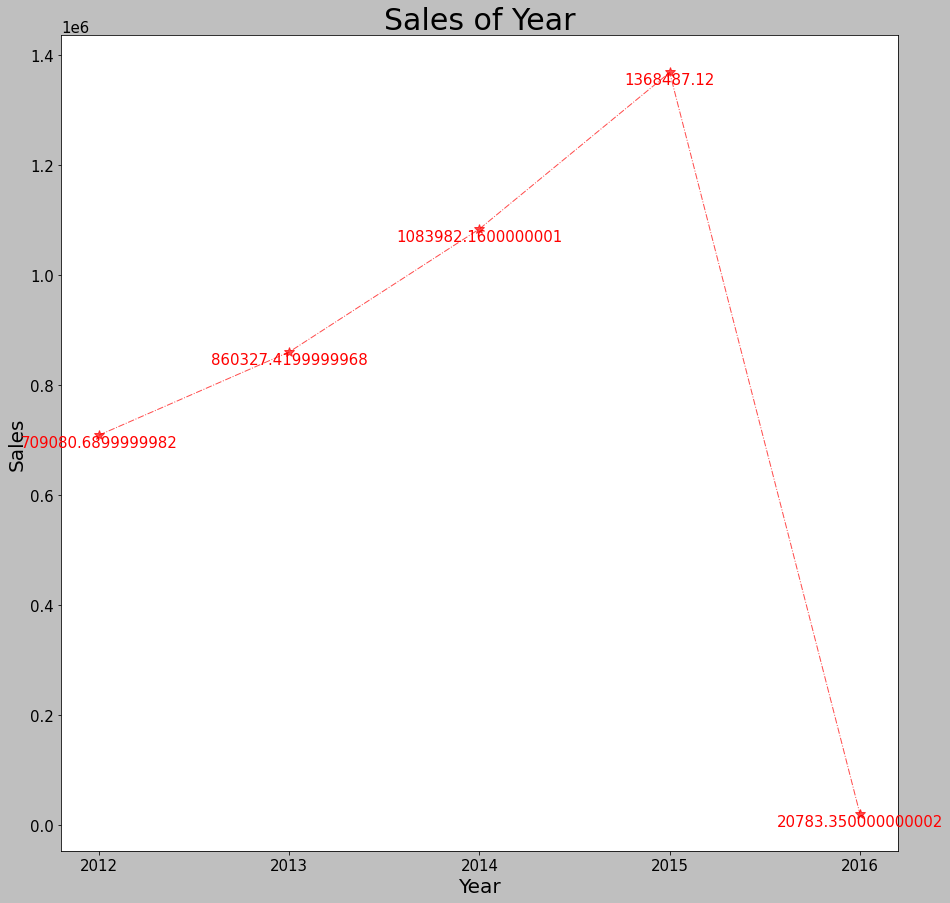

In [90]:
plt.style.use('grayscale')
plt.plot(Asia_Pacific_sales, color='r', marker='*', linestyle='-.', linewidth=1, markersize=10, alpha=0.7)
plt.rcParams["figure.figsize"] = (15,10)

for i in range(len(Asia_Pacific_sales)):
    plt.text(i, Asia_Pacific_sales[i], Asia_Pacific_sales[i], ha='center', va='top', fontsize = 15, c='r')
    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=15)
    plt.xlabel('Year', fontsize=20)
    plt.ylabel('Sales', fontsize=20)
    plt.title('Sales of Year', fontsize=30)

plt.show()

In [21]:
Asia_Pacific_Quantity = Asia_Pacific_table.groupby(df['Year'])['Quantity'].sum()
Asia_Pacific_Quantity

Year
2012     8408
2013    10353
2014    12851
2015    16684
2016      301
Name: Quantity, dtype: int64

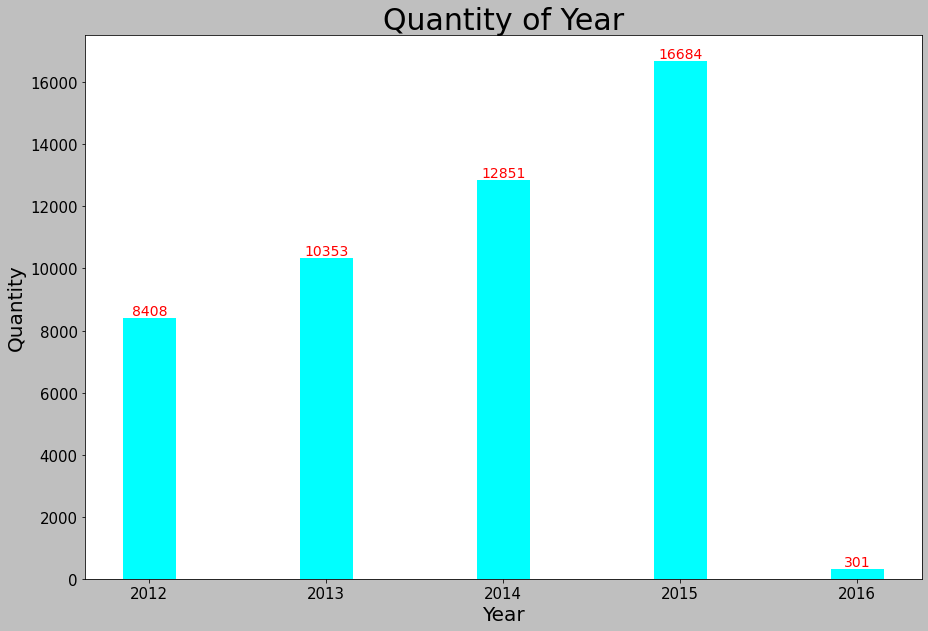

In [22]:
Years  = [Year for Year, sale in Asia_Pacific_Quantity.items()]
plt.style.use('grayscale')
plt.rcParams["figure.figsize"] = (15,10)
plt.bar(x = Years, height = Asia_Pacific_Quantity, color = 'aqua', width=0.3)
plt.hist(Years, rwidth = 0.5)

for i in range(len(Asia_Pacific_Quantity)):
    plt.text(i, Asia_Pacific_Quantity[i], Asia_Pacific_Quantity[i], ha='center', va='bottom', fontsize = 14, c='r')
    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=15)
    plt.xlabel('Year', fontsize = 20)
    plt.ylabel('Quantity', fontsize = 20)
    plt.title('Quantity of Year', fontsize = 30)
    
plt.show()

In [23]:
Country_sales = Asia_Pacific_table.groupby(df['Country'])['Sales'].sum()
Country_sales

Country
Afghanistan              21673.32
Armenia                    156.75
Australia               925236.91
Azerbaijan                5631.51
Bahrain                    669.18
Bangladesh               78256.47
Bhutan                     164.07
Cambodia                 17476.02
China                   700562.09
Georgia                   5427.42
Hong Kong                 6147.00
India                   589486.12
Indonesia               404887.67
Iran                    113746.11
Iraq                     70714.80
Israel                   19294.08
Japan                   100787.54
Jordan                    7326.15
Kazakhstan                4605.48
Kuwait                    1094.22
Kyrgyzstan                5106.30
Laos                       590.13
Lebanon                   2796.66
Malaysia                 61362.21
Mongolia                  6789.84
Myanmar (Burma)          34138.88
Nepal                     3522.24
New Zealand             172020.63
Oman                        76.65
Pakist

In [24]:
Asia_Pacific_Country = Asia_Pacific_table.loc[df['Country'] == 'Australia']
Asia_Pacific_Country

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sum_Profit,Shipping Cost,Order Priority,Year
1,26341,IN-2014-JR162107-41675,02-05-2014,02-07-2014,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,288.77,2598.93,923.63,Critical,2014
2,25330,IN-2014-CR127307-41929,10-17-2014,10-18-2014,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,8279.73,915.49,Medium,2014
5,22732,IN-2014-JM156557-41818,6-28-2014,07-01-2014,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,...,Phones,"Samsung Smart Phone, with Caller ID",2862.68,5,0.1,763.28,3816.40,897.35,Critical,2014
18,22096,IN-2015-JS156857-42035,1-31-2015,02-01-2015,First Class,JS-156857,Jim Sink,Corporate,NaN,Townsville,...,Copiers,"Brother Fax Machine, High-Speed",2565.59,9,0.1,28.40,255.60,766.93,Critical,2015
33,21286,IN-2012-DP131057-41215,11-02-2012,11-04-2012,Second Class,DP-131057,Dave Poirier,Corporate,NaN,Gold Coast,...,Appliances,"Breville Stove, Red",2526.93,5,0.1,561.48,2807.40,689.80,Critical,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51180,26466,ID-2014-BD116207-41791,06-01-2014,06-05-2014,Standard Class,BD-116207,Brian DeCherney,Consumer,NaN,Canberra,...,Envelopes,"Cameo Clasp Envelope, Recycled",24.93,5,0.4,8.37,41.85,1.06,Medium,2014
51184,21343,IN-2014-DR129407-41728,3-30-2014,04-01-2014,First Class,DR-129407,Daniel Raglin,Home Office,NaN,Sydney,...,Paper,"SanDisk Memo Slips, Multicolor",49.65,3,0.1,1.05,3.15,1.06,Medium,2014
51248,27948,IN-2014-RE194507-41846,7-26-2014,7-26-2014,Same Day,RE-194507,Richard Eichhorn,Consumer,NaN,Brisbane,...,Labels,"Avery Legal Exhibit Labels, Laser Printer Comp...",30.62,3,0.1,1.01,3.03,1.05,Medium,2014
51264,22589,IN-2015-AO108107-42333,11-25-2015,11-30-2015,Standard Class,AO-108107,Anthony O'Donnell,Corporate,NaN,Perth,...,Envelopes,"GlobeWeis Manila Envelope, Recycled",47.14,2,0.1,8.86,17.72,1.03,Medium,2015


In [25]:
City_sales = Asia_Pacific_Country.groupby(df['City'])['Sales'].sum()
City_sales

City
Adelaide         57896.78
Albany           12035.30
Albury           12397.75
Alice Springs     6011.51
Armidale          1791.21
                   ...   
Wagga Wagga       8865.93
Warrnambool       1168.94
Whyalla           9226.98
Wodonga           6577.51
Wollongong       42247.22
Name: Sales, Length: 63, dtype: float64

In [26]:
City_sales_max = City_sales.nlargest(10, keep='first')
City_sales_max

City
Sydney        101945.68
Brisbane       75729.13
Melbourne      73843.65
Gold Coast     72627.00
Perth          64292.33
Adelaide       57896.78
Newcastle      46055.13
Wollongong     42247.22
Canberra       33162.80
Geelong        30997.08
Name: Sales, dtype: float64

In [27]:
City_Quantity = Asia_Pacific_Country.groupby(df['City'])['Quantity'].sum()
City_Quantity

City
Adelaide         685
Albany           110
Albury           104
Alice Springs     30
Armidale          40
                ... 
Wagga Wagga       84
Warrnambool       40
Whyalla           89
Wodonga           83
Wollongong       468
Name: Quantity, Length: 63, dtype: int64

In [28]:
City_Quantity_max = City_Quantity.nlargest(10, keep='first')
City_Quantity_max

City
Sydney        975
Melbourne     811
Perth         737
Gold Coast    728
Brisbane      689
Adelaide      685
Canberra      574
Newcastle     506
Wollongong    468
Geelong       340
Name: Quantity, dtype: int64

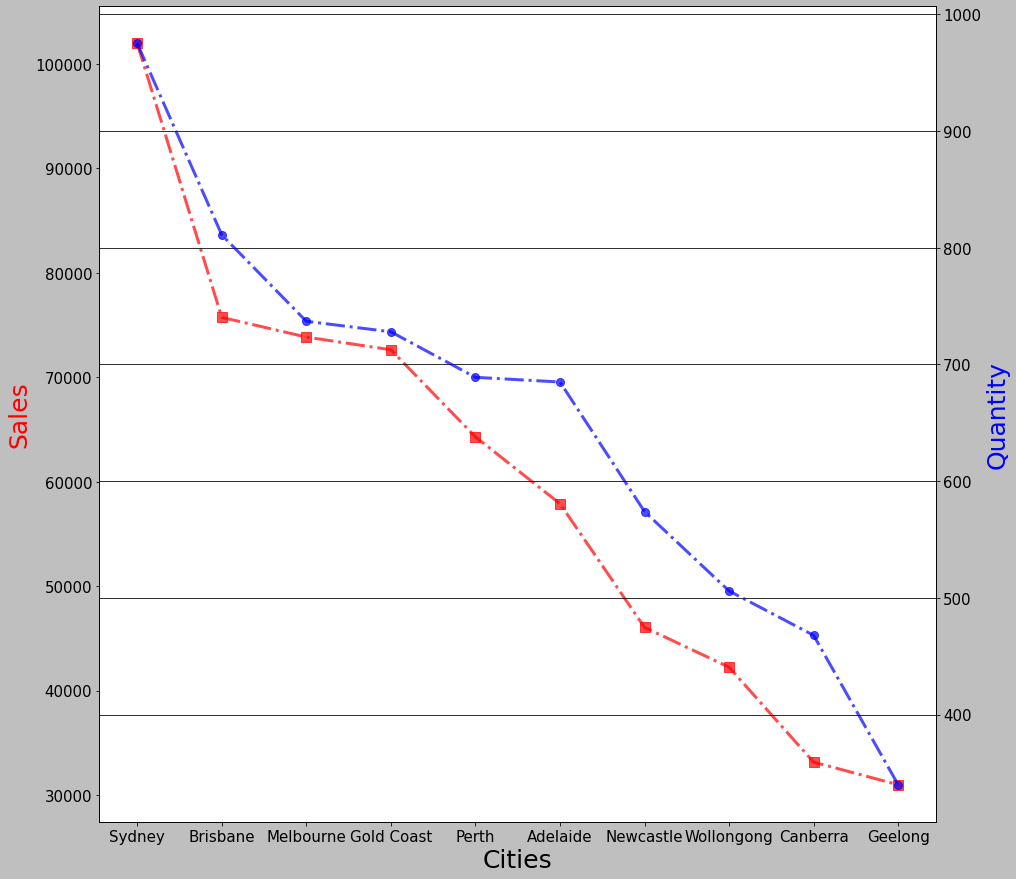

In [29]:
Cities  = [City for City, sale in City_sales_max.items()]

x = Cities
y1 = City_sales_max
y2 = City_Quantity_max
plt.style.use('grayscale')
plt.rcParams["figure.figsize"] = (15,15)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1, 'r-', marker='s', linestyle='-.', linewidth=3, markersize=10, alpha=0.7)
ax2.plot(x, y2, 'b-', marker='o', linestyle='-.', linewidth=3, markersize=8, alpha=0.7)

ax1.set_xlabel('Cities', size=25)
ax1.set_ylabel('Sales', color='r', size=25)
ax2.set_ylabel('Quantity', color='b', size = 25)

plt.grid()
plt.show()

In [30]:
City_Discount = Asia_Pacific_Country.groupby(df['City'])['Discount'].sum()
City_Discount

City
Adelaide         16.2
Albany            2.8
Albury            1.8
Alice Springs     0.4
Armidale          1.0
                 ... 
Wagga Wagga       1.7
Warrnambool       3.7
Whyalla           1.9
Wodonga           2.5
Wollongong        9.5
Name: Discount, Length: 63, dtype: float64

In [116]:
City_Discount_max = City_Discount.loc[['Sydney', 'Melbourne', 'Perth','Gold Coast', 'Brisbane','Adelaide', 'Canberra', 'Newcastle', 'Wollongong','Geelong']]
City_Discount_max1 = City_Discount_max.nlargest(10, keep='first')
City_Discount_max1 = City_Discount_max1 / 10
City_Discount_max1

City
Canberra      5.64
Gold Coast    3.61
Sydney        2.77
Melbourne     2.50
Perth         2.04
Brisbane      1.80
Adelaide      1.62
Geelong       1.61
Newcastle     1.06
Wollongong    0.95
Name: Discount, dtype: float64

In [114]:
City_sales_max1 = City_sales_max / 10000
City_sales_max1

City
Sydney        10.194568
Brisbane       7.572913
Melbourne      7.384365
Gold Coast     7.262700
Perth          6.429233
Adelaide       5.789678
Newcastle      4.605513
Wollongong     4.224722
Canberra       3.316280
Geelong        3.099708
Name: Sales, dtype: float64

In [115]:
City_Quantity_max1 = City_Quantity_max / 100
City_Quantity_max1

City
Sydney        9.75
Melbourne     8.11
Perth         7.37
Gold Coast    7.28
Brisbane      6.89
Adelaide      6.85
Canberra      5.74
Newcastle     5.06
Wollongong    4.68
Geelong       3.40
Name: Quantity, dtype: float64

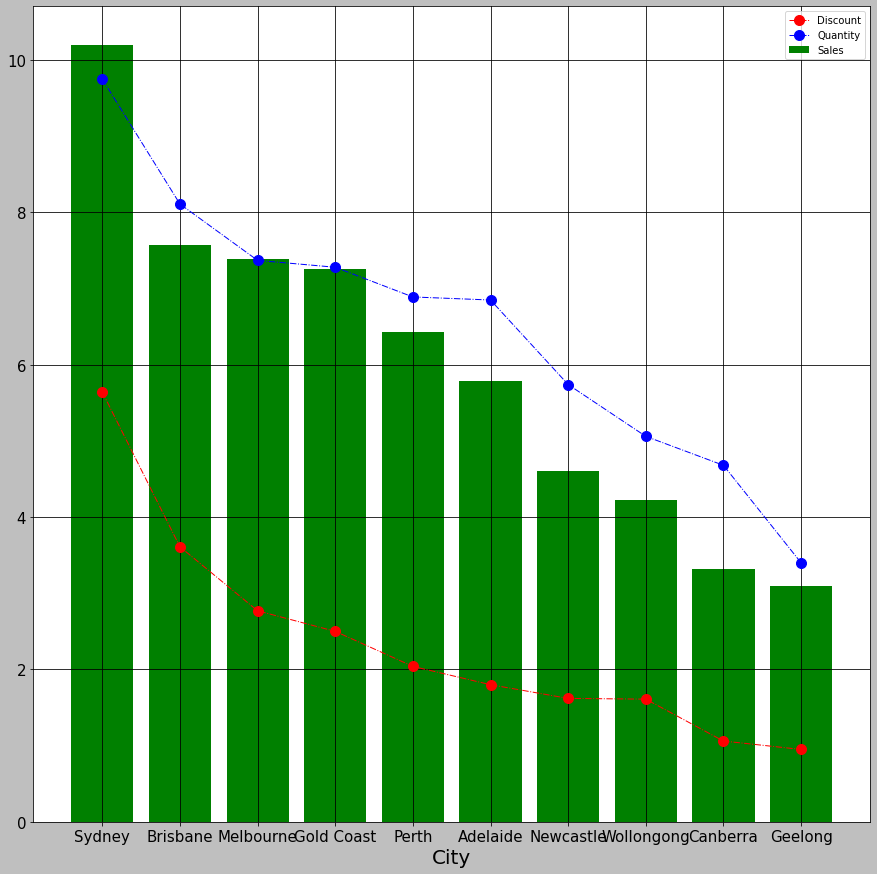

In [131]:
#Tạo biểu đồ có 3 đường thể hiện Sales, Discount, Sum_Profit cho 10 thành phố lớn nhất
Cities  = [City for City, sale in City_sales_max1.items()]

plt.style.use('grayscale')

plt.plot(Cities, City_Discount_max1, label='Discount', c='r',  marker='o', linestyle='-.', linewidth=1, markersize=10, alpha=1)
plt.bar(x=Cities, height=City_sales_max1, label='Sales', color = 'g')
plt.plot(Cities, City_Quantity_max1, label='Quantity', c='b',  marker='o', linestyle='-.', linewidth=1, markersize=10, alpha=1)
plt.xlabel('City', fontsize = 20)

plt.grid()
plt.legend()
plt.show()